In [13]:
import nappy.nappy_api
import pandas as pd 
# import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import calendar

In [14]:
adjusted_csv_path = os.path.join(os.getcwd(), 'final_adjusted_2011_2024.csv')

def adjusted_coefficients(csv_file):
    
    date = []
    starttime = []
    scattering_coeff = []
    absorption_coeff = []
    absorption_angstrom = []
    scattering_angstrom = []
    
    adjusted_csv = pd.read_csv(csv_file, header=0) 
    
    adjusted_csv.replace([99999.99, 9999.99, 999.999999, 999.99, 99.999, 9.999], np.NaN, inplace=True)  
      
    
    for selected_columns in adjusted_csv.columns:
        
        if selected_columns.startswith('pm1') or selected_columns.startswith('starttime') or selected_columns.startswith('Date'):

            if selected_columns.startswith('pm1'):

                variable = selected_columns.find('_') + 1
                
                selected_variable = selected_columns[variable: (variable + 10)]

                if selected_columns.startswith('pm1'):
                    
                    if selected_variable == 'scattering':
                        
                        variable = selected_columns.find('angstrom')    
                                    
                        if variable == -1:
                            scattering_coeff.append(selected_columns)
                            
                        else:
                            scattering_angstrom.append(selected_columns)
                
                    else: 
                        variable = selected_columns.find('angstrom')
                        
                        if variable == -1:
                            absorption_coeff.append(selected_columns)
                            
                        else:
                            absorption_angstrom.append(selected_columns)
                        
            elif selected_columns.startswith('starttime'):

                starttime.append(selected_columns)
                
            else:
                date.append(selected_columns)
                        
    return starttime, absorption_coeff, absorption_angstrom, scattering_coeff, scattering_angstrom, date, adjusted_csv
    
adjusted_coefficients(adjusted_csv_path)

(['starttime'],
 ['pm10_absorption_coeff_450',
  'pm10_absorption_coeff_550',
  'pm10_absorption_coeff_700',
  'pm1_absorption_coeff_450',
  'pm1_absorption_coeff_550',
  'pm1_absorption_coeff_700'],
 ['pm10_absorption_angstrom_450_550',
  'pm10_absorption_angstrom_450_700',
  'pm10_absorption_angstrom_550_700',
  'pm1_absorption_angstrom_450_550',
  'pm1_absorption_angstrom_450_700',
  'pm1_absorption_angstrom_550_700'],
 ['pm10_scattering_coeff_450',
  'pm10_scattering_coeff_550',
  'pm10_scattering_coeff_700',
  'pm1_scattering_coeff_450',
  'pm1_scattering_coeff_550',
  'pm1_scattering_coeff_700'],
 ['pm10_scattering_angstrom_450_550',
  'pm10_scattering_angstrom_450_700',
  'pm10_scattering_angstrom_550_700',
  'pm1_scattering_angstrom_450_550',
  'pm1_scattering_angstrom_450_700',
  'pm1_scattering_angstrom_550_700'],
 ['Date'],
         starttime                 Date  pm10_scattering_coeff_450  \
 0        24.00000  2011-01-24 00:00:00                       2.17   
 1        24.

In [15]:
aerosol_variable = input('what variable are you looking for?')

def aerosol_plots(columns, variable):
    
    variable_columns = []
    
    dataframe = columns[6]
    
    new_dictionary = {
            'angstrom_exponent': {
            'scattering': columns[4],
            'absorption': columns[2]
        },
        'starttime':columns[0]
    }
    
    for variable in new_dictionary['angstrom_exponent'][variable]:    
        variable_columns.append(variable)
        
    for time in new_dictionary['starttime']:
        variable_columns.append(time)
    
    return dataframe[variable_columns]
    
columns = adjusted_coefficients(adjusted_csv_path)
aerosol_plots(columns, aerosol_variable)

,pm10_scattering_angstrom_450_550,pm10_scattering_angstrom_450_700,pm10_scattering_angstrom_550_700,pm1_scattering_angstrom_450_550,pm1_scattering_angstrom_450_700,pm1_scattering_angstrom_550_700,starttime
0,2.166,2.025,1.907,NaN,NaN,NaN,24.00000
1,NaN,NaN,NaN,NaN,NaN,NaN,24.04167
2,NaN,NaN,NaN,NaN,NaN,NaN,24.08333
3,NaN,NaN,NaN,NaN,NaN,NaN,24.12500
4,NaN,NaN,NaN,NaN,NaN,NaN,24.16667
...,...,...,...,...,...,...,...
113785,1.437,1.587,1.712,1.817,1.977,2.111,366.79167
113786,2.577,2.396,2.245,2.838,2.858,2.875,366.83333
113787,2.094,2.321,2.510,2.488,2.721,2.915,366.87500
113788,2.413,3.173,3.806,2.311,3.062,3.686,366.91667


In [16]:
# def angstrom_exponent(monthly_averages):
        
#     coefficients = {
#         'pm1': {450:[], 700:[]},
#         'pm10': {450:[], 700:[]},
#         'starttime' : [] 
#     }
    
#     legend = []
    
#     for column in monthly_averages.columns: 

#         # Filter to wavlengths
#         if column in ['starttime', 'pm1_aerosol_light_scattering_coefficient_1', 'pm1_aerosol_light_scattering_coefficient_7', 
#                       'pm10_aerosol_light_scattering_coefficient_1', 'pm10_aerosol_light_scattering_coefficient_7']:
#             legend.append(column)
            
#     selected_coeff = pd.DataFrame(monthly_averages[legend])

#     for wavelength in selected_coeff.columns:
#         if wavelength == 'starttime':  
#             coefficients['starttime'].extend(selected_coeff['starttime'].tolist())
#             continue

#         list = None
        
#         if wavelength.startswith('pm10'): 
#             if wavelength.endswith('1'):
#                 list = coefficients['pm10'][450]
            
#             else:
#                 list = coefficients['pm10'][700]
                
#         else:
            
#             if wavelength.endswith('1'):
#                 list = coefficients['pm1'][450]
            
#             else:
#                 list = coefficients['pm1'][700]
                
#         for row in range(len(selected_coeff)): 
#             coef = selected_coeff[wavelength][row]
#             list.append(coef)   
            
#     calculated_values = {
#         'pm1': [],
#         'pm10': [],
#         'starttime': []
#     }         

#     for row in range(len(coefficients['starttime'])):
        
#         for value in ['pm1', 'pm10']:
#             list450 = coefficients[value][450]
#             list700 = coefficients[value][700]
            
#             x = list450[row]
#             y = list700[row]
            
#             ae_value = np.NAN
            
#             if y != 0 and (x * y) >= 0: ## excluded null values and values that were equal to each other
#                 try:
#                     log_value = -np.log((x) / (y)) ## Full equation for angstrom exponent
#                     log_wave_ratio = np.log((.450 / .700))
                    
#                     if log_wave_ratio != 0: ## excluded values in the denominator that = 0          
#                         ae_value =  (log_value / log_wave_ratio) ## Carry out equation
                        
#                 except ZeroDivisionError:
#                     ae_value = np.NAN
#                 except ValueError:
#                     ae_value = np.NAN
                   
#             calculated_values[value].append(ae_value)

#         calculated_values['starttime'].append(coefficients['starttime'][row])   
        
#     for idx in range(len(calculated_values['starttime']) - 1, -1, -1):
#         if pd.isnull(calculated_values['pm1'][idx]) or pd.isnull(calculated_values['pm10'][idx]): # or calculated_values['pm1'][idx] < -0.5 or calculated_values['pm10'][idx] < -0.5:
#             del calculated_values['pm1'][idx]
#             del calculated_values['pm10'][idx]
#             del calculated_values['starttime'][idx] 
                
#     ae_df = pd.DataFrame(calculated_values)
#     ae_df.to_csv('Angstrom_exponent_pm1_pm10_dataframe.csv', index=False)

#     return ae_df            

# columns = adjusted_coefficients(adjusted_csv_path)
# plots = aerosol_plots(columns, aerosol_variable)
# angstrom_exponent(plots)


In [17]:
def cleaned_csv(data_copy):
    
    final_dataframe = []
    
    selected_columns = [f'pm1_{aerosol_variable}_angstrom_450_700', f'pm10_{aerosol_variable}_angstrom_450_700', 'starttime']
    
    selected_data = [data_copy[column] for column in selected_columns if column in data_copy.columns]
    
    if not selected_data: 
        return pd.DataFrame()
    
    dataframe = pd.concat(selected_data, axis=1) 

    for row in dataframe.values:

            if pd.isnull(row).any():
                continue
            
            else:
                final_dataframe.append(row)
                
    dataframe = pd.DataFrame(final_dataframe, columns=dataframe.columns)

    return dataframe    

columns = adjusted_coefficients(adjusted_csv_path)
plots = aerosol_plots(columns, aerosol_variable) 
cleaned_csv(plots)  



,pm1_scattering_angstrom_450_700,pm10_scattering_angstrom_450_700,starttime
0,3.041,2.449,25.91667
1,2.769,1.980,25.95833
2,2.553,1.831,26.00000
3,2.239,2.067,26.04167
4,2.394,1.997,26.08333
...,...,...,...
104990,1.977,1.587,366.79167
104991,2.858,2.396,366.83333
104992,2.721,2.321,366.87500
104993,3.062,3.173,366.91667


In [18]:
def monthly_aerosol_df(dataframe):

    dataframe['time_int'] = np.floor(dataframe['starttime']).astype(int)
    
    ave_day = dataframe.groupby('time_int')[f'pm1_{aerosol_variable}_angstrom_450_700', f'pm10_{aerosol_variable}_angstrom_450_700'].mean().reset_index()        
                                
    return ave_day

columns = adjusted_coefficients(adjusted_csv_path)
plots = aerosol_plots(columns, aerosol_variable)
cleaned = cleaned_csv(plots)  
monthly_aerosol_df(cleaned)

/var/folders/qt/58dpzqx91zx8zdcphrmx5ynw0000gn/T/ipykernel_59228/700714352.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ave_day = dataframe.groupby('time_int')[f'pm1_{aerosol_variable}_angstrom_450_700', f'pm10_{aerosol_variable}_angstrom_450_700'].mean().reset_index()


,time_int,pm1_scattering_angstrom_450_700,pm10_scattering_angstrom_450_700
0,1,2.161602,1.565342
1,2,2.262161,1.745927
2,3,2.097347,1.463522
3,4,2.002774,1.430662
4,5,2.185142,1.657900
...,...,...,...
361,362,2.089703,1.582182
362,363,2.290863,1.714736
363,364,2.257662,1.647431
364,365,2.008342,1.458622


In [19]:
def monthly_averages(ave_day):
    monthly_avg = []

    for month in range(1, 13):
        
        month_name = calendar.month_name[month]
        days_in_month = calendar.monthrange(2011, month)[1]
        
        month_data = ave_day.iloc[:days_in_month]
        
        # month_avg = month_data[[f'pm1_{aerosol_variable}_angstrom_450_700', f'pm10_{aerosol_variable}_angstrom_450_700']].mean()
        month_avg = month_data[[f'pm10_{aerosol_variable}_angstrom_450_700']].mean()

        
        month_avg_dict = month_avg.to_dict()
        month_avg_dict['month'] = month_name 
        
        monthly_avg.append(month_avg_dict)
        ave_day = ave_day.iloc[days_in_month:]

    monthly_avg_df = pd.DataFrame(monthly_avg)
    monthly_avg_df.rename(columns={f'pm10_{aerosol_variable}_angstrom_450_700': f'pm10_{aerosol_variable}_angstrom_450_700_SPL'}, inplace=True)

    # if f'pm1_{aerosol_variable}_angstrom_450_700' in monthly_avg_df.columns:
    #     monthly_avg_df.drop(f'pm1_{aerosol_variable}_angstrom_450_700', axis=1, inplace=True) 
    return monthly_avg_df

In [20]:
columns = adjusted_coefficients(adjusted_csv_path)
plots = aerosol_plots(columns, aerosol_variable)
cleaned = cleaned_csv(plots)  
d = monthly_aerosol_df(cleaned)
spl_data = monthly_averages(d)

table_mountian_SAE = pd.read_csv(f'table_mountain_{aerosol_variable}_Angstrom')
table_mountian_SAE = pd.DataFrame(table_mountian_SAE)
table_mountian_SAE.drop('Unnamed: 0', axis = 1, inplace=True)
table_mountian_SAE.rename(columns={f'pm10_{aerosol_variable}_angstrom_450_700': f'pm10_{aerosol_variable}_angstrom_450_700_BOS'}, inplace=True)

merged_data_scattering = table_mountian_SAE.merge(spl_data)
merged_data_scattering

/var/folders/qt/58dpzqx91zx8zdcphrmx5ynw0000gn/T/ipykernel_59228/700714352.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ave_day = dataframe.groupby('time_int')[f'pm1_{aerosol_variable}_angstrom_450_700', f'pm10_{aerosol_variable}_angstrom_450_700'].mean().reset_index()


,pm10_scattering_angstrom_450_700_BOS,month,pm10_scattering_angstrom_450_700_SPL
0,1.698086,January,1.625530
1,1.682432,February,1.595947
2,1.565828,March,1.434201
3,1.362470,April,1.371560
4,1.445149,May,1.469390
5,1.605877,June,1.722816
6,1.770680,July,1.941658
7,1.778633,August,1.911047
8,1.652326,September,1.841422
9,1.597324,October,1.764209


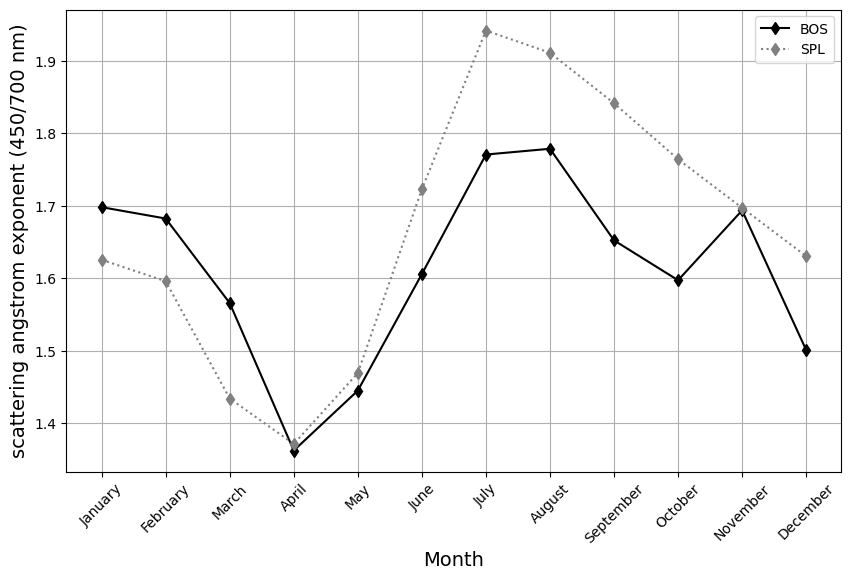

In [21]:
def monthly_plot(monthly_avg_df):

    key = ['SPL', 'BOS']
    
    plt.figure(figsize=(10,6))

    for col in monthly_avg_df.columns:
        if col.endswith('BOS'):
            plt.plot(monthly_avg_df['month'], monthly_avg_df[col], label=key[1], marker='d', color='black')
            
        elif col.endswith('SPL'):
            plt.plot(monthly_avg_df['month'], monthly_avg_df[col], label=key[0], marker='d', linestyle='dotted', color='grey')
            
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel(f'{aerosol_variable} angstrom exponent (450/700 nm)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    plt.close()

monthly_plot(merged_data_scattering)

In [10]:
aerosol_variable = input('what variable are you looking for?')

columns = adjusted_coefficients(adjusted_csv_path)
plots = aerosol_plots(columns, aerosol_variable)
cleaned = cleaned_csv(plots)  
d = monthly_aerosol_df(cleaned)
spl_data = monthly_averages(d)

table_mountian_SAE = pd.read_csv(f'table_mountain_{aerosol_variable}_Angstrom')
table_mountian_SAE = pd.DataFrame(table_mountian_SAE)
table_mountian_SAE.drop('Unnamed: 0', axis = 1, inplace=True)
table_mountian_SAE.rename(columns={f'pm10_{aerosol_variable}_angstrom_450_700': f'pm10_{aerosol_variable}_angstrom_450_700_BOS'}, inplace=True)

merged_data_absorption = table_mountian_SAE.merge(spl_data)
merged_data_absorption

/var/folders/qt/58dpzqx91zx8zdcphrmx5ynw0000gn/T/ipykernel_59228/700714352.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ave_day = dataframe.groupby('time_int')[f'pm1_{aerosol_variable}_angstrom_450_700', f'pm10_{aerosol_variable}_angstrom_450_700'].mean().reset_index()


,pm10_absorption_angstrom_450_700_BOS,month,pm10_absorption_angstrom_450_700_SPL
0,1.366840,January,1.256694
1,1.398600,February,1.236146
2,1.387831,March,1.307031
3,1.485657,April,1.379855
4,1.349473,May,1.389272
5,1.240369,June,1.249716
6,1.148442,July,1.053542
7,1.316667,August,1.180635
8,1.431701,September,1.327828
9,1.513570,October,1.377514


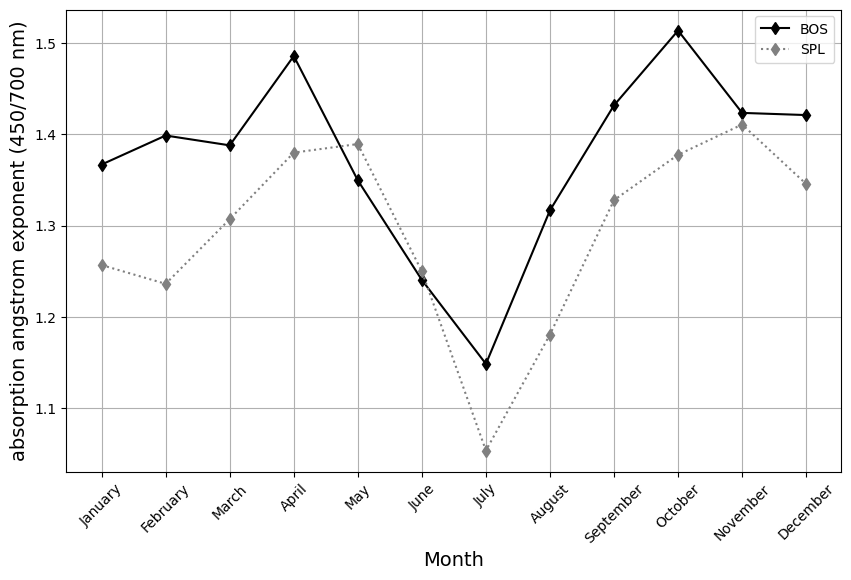

In [11]:
def monthly_plot(monthly_avg_df):

    key = ['SPL', 'BOS']
    
    plt.figure(figsize=(10,6))

    for col in monthly_avg_df.columns:
        if col.endswith('BOS'):
            plt.plot(monthly_avg_df['month'], monthly_avg_df[col], label=key[1], marker='d', color='black')
            
        elif col.endswith('SPL'):
            plt.plot(monthly_avg_df['month'], monthly_avg_df[col], label=key[0], marker='d', linestyle='dotted', color='grey')
            
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel(f'{aerosol_variable} angstrom exponent (450/700 nm)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    plt.close()

monthly_plot(merged_data_absorption)